# Overview

Use this as a template for building PyTorch models.

In [1]:
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch
import torch.nn as nn
import torchvision

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Create PyTorch DataLoader

In [2]:
class FrequencyDataset(Dataset):
    "Frequency measurements data."
    
    def __init__(self, features, targets):
        'Initialization.'
        self.X = np.array(features)
        self.Y = np.array(targets)
        self.sample_index = np.shape(features)[0]
        
    def __len__(self):
        'Denotes the total number of samples.'
        return self.sample_index
    
    def __getitem__(self, index):
        'Generates a sample of data.'
        # Select index of sample.
        X_sample = X[index]
        Y_sample = Y[index]
        
        return X_sample, Y_sample

# Create Synthetic Data

In [3]:
#X = np.random.uniform(0,1,(1000,5))
#Y = np.where(np.mean(X, axis=1)<0.5, 0, 1)

X = np.arange(1000)+1
Y = X % 4
X = np.reshape(X, (-1, 1))

X_train = X[0:500]
Y_train = Y[0:500]

X_val = X[500:]
Y_val = Y[500:]

print(X[0:5])
print(Y[0:5])

[[1]
 [2]
 [3]
 [4]
 [5]]
[1 2 3 0 1]


# Hyperparameters

In [16]:
params = {'batch_size': 8,
          'shuffle': True
         }

input_size = 1
hidden_size = 128
num_classes = 4
num_epochs = 50
batch_size = 100
learning_rate = 0.001

# Misc Functions

In [28]:
def prediction_accuracy(predictions, actual_targets):
    
    """
    Calculate prediction accuracy.
    """
    
    if type(predictions) == torch.Tensor:
        predictions = predictions.detach().numpy()
        
    if type(actual_targets) == torch.Tensor:
        actual_targets = actual_targets.detach().numpy()
    
    class_predictions_train = np.argmax(predictions, axis=1)
    accuracy = np.mean(class_predictions_train == actual_targets)
    
    return accuracy

# Define and Train MLP

In [34]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

training_set = FrequencyDataset(X_train.astype(np.float64), Y_train)
training_generator = DataLoader(training_set, **params)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size) 
        self.fc3 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes).to(device).double()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(training_generator)

loss_per_epoch_train = []
accuracy_per_epoch_train = []
loss_per_epoch_val = []
accuracy_per_epoch_val = []

# Make sure that X_val, and Y_val are tensor objects so that
# they work in the training process.
if type(X_val) ==n p.ndarray:
    X_val = torch.from_numpy(X_val).to(device).double()
    
if type(Y_val) == np.ndarray:
    Y_val = torch.from_numpy(Y_val).to(device)

for epoch in range(num_epochs):
    
    for i, (X_batch, Y_batch) in enumerate(training_generator):  
        # Move tensors to the configured device
        X_batch = X_batch.to(device).double()
        Y_batch = Y_batch.to(device)
        
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Display training stats and save metrics.
        if (i+1) % 10 == 0:
            
            loss_per_epoch_train.append(loss.item())
            
            accuracy_train = prediction_accuracy(outputs, Y_batch)
            accuracy_per_epoch_train.append(accuracy_train)
            
            outputs_val = model(X_val)
            
            loss_val = criterion(outputs_val, Y_val)
            loss_per_epoch_val.append(loss_val)
            
            accuracy_val = prediction_accuracy(outputs_val, Y_val)
            accuracy_per_epoch_val.append(accuracy_val)
            
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Acc: {:.2f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item(), accuracy_train))

Epoch [1/50], Step [10/63], Loss: 4.2037, Acc: 0.25
Epoch [1/50], Step [20/63], Loss: 4.7194, Acc: 0.25
Epoch [1/50], Step [30/63], Loss: 1.2984, Acc: 0.25
Epoch [1/50], Step [40/63], Loss: 5.5190, Acc: 0.25
Epoch [1/50], Step [50/63], Loss: 4.5627, Acc: 0.25
Epoch [1/50], Step [60/63], Loss: 2.0845, Acc: 0.25
Epoch [2/50], Step [10/63], Loss: 5.5305, Acc: 0.25
Epoch [2/50], Step [20/63], Loss: 0.9623, Acc: 0.25
Epoch [2/50], Step [30/63], Loss: 4.2224, Acc: 0.25
Epoch [2/50], Step [40/63], Loss: 1.4027, Acc: 0.25
Epoch [2/50], Step [50/63], Loss: 2.8892, Acc: 0.25
Epoch [2/50], Step [60/63], Loss: 2.3603, Acc: 0.25
Epoch [3/50], Step [10/63], Loss: 1.3874, Acc: 0.25
Epoch [3/50], Step [20/63], Loss: 1.3034, Acc: 0.25
Epoch [3/50], Step [30/63], Loss: 2.2373, Acc: 0.25
Epoch [3/50], Step [40/63], Loss: 2.2533, Acc: 0.25
Epoch [3/50], Step [50/63], Loss: 2.4445, Acc: 0.25
Epoch [3/50], Step [60/63], Loss: 8.5343, Acc: 0.25
Epoch [4/50], Step [10/63], Loss: 2.0263, Acc: 0.25
Epoch [4/50]

Epoch [27/50], Step [30/63], Loss: 1.1882, Acc: 0.25
Epoch [27/50], Step [40/63], Loss: 1.4265, Acc: 0.25
Epoch [27/50], Step [50/63], Loss: 1.5354, Acc: 0.25
Epoch [27/50], Step [60/63], Loss: 1.2732, Acc: 0.25
Epoch [28/50], Step [10/63], Loss: 1.3166, Acc: 0.25
Epoch [28/50], Step [20/63], Loss: 1.4493, Acc: 0.25
Epoch [28/50], Step [30/63], Loss: 1.6149, Acc: 0.25
Epoch [28/50], Step [40/63], Loss: 1.5716, Acc: 0.25
Epoch [28/50], Step [50/63], Loss: 1.3891, Acc: 0.25
Epoch [28/50], Step [60/63], Loss: 1.4836, Acc: 0.25
Epoch [29/50], Step [10/63], Loss: 1.5523, Acc: 0.25
Epoch [29/50], Step [20/63], Loss: 1.6132, Acc: 0.25
Epoch [29/50], Step [30/63], Loss: 1.3310, Acc: 0.25
Epoch [29/50], Step [40/63], Loss: 1.5462, Acc: 0.25
Epoch [29/50], Step [50/63], Loss: 1.3525, Acc: 0.25
Epoch [29/50], Step [60/63], Loss: 1.6849, Acc: 0.25
Epoch [30/50], Step [10/63], Loss: 1.5090, Acc: 0.25
Epoch [30/50], Step [20/63], Loss: 1.3953, Acc: 0.25
Epoch [30/50], Step [30/63], Loss: 1.4072, Acc

# Visualise Training Metrics

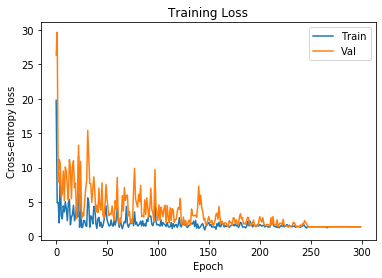

In [32]:
plt.plot(loss_per_epoch_train, label = "Train")
plt.plot(loss_per_epoch_val, label = "Val")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Cross-entropy loss")
plt.legend()

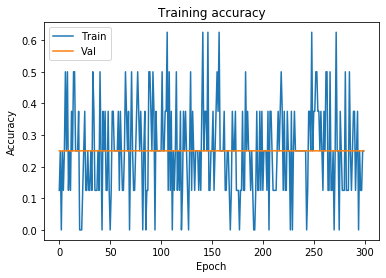

In [33]:
plt.plot(accuracy_per_epoch_train, label = "Train")
plt.plot(accuracy_per_epoch_val, label = "Val")
plt.title("Training accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()